# ✈️ Twitter US Airline Sentiment Analysis  

> **Goal:** Perform **Sentiment Analysis** on airline tweets using **Natural Language Processing (NLP)** techniques to classify tweets as *Positive 😃*, *Neutral 😐*, or *Negative 😡*.  

---

## 📌 Steps Followed  

### 1️⃣ **Data Loading**  
- Loaded the **Twitter US Airline Sentiment dataset** using `pandas`.  
- Explored dataset shape, columns, and first few rows.  

### 2️⃣ **Exploratory Data Analysis (EDA)**  
- Checked the **distribution of sentiment labels**.  
- Verified **missing values** and null entries.  

### 3️⃣ **Text Preprocessing 🧹**  
- Converted text to **lowercase**.  
- Removed **URLs, mentions (@user), and special characters**.  
- Applied **tokenization, stopword removal, and lemmatization**.  
- Created a new column → `clean_text`.  

### 4️⃣ **Label Encoding**  
Mapped target classes:  
- `Negative → 0`  
- `Neutral → 1`  
- `Positive → 2`  

### 5️⃣ **Train-Test Split**  
- Split data into **80% training** and **20% testing**.  

### 6️⃣ **Feature Extraction 🔎**  
- Used **TF-IDF Vectorizer** with unigrams & bigrams (`max_features=20000`).  

### 7️⃣ **Model Training 🤖**  
- Trained a **Logistic Regression** classifier.  
- Tuned hyperparameters like **max iterations**.  

### 8️⃣ **Model Evaluation 📊**  
- Generated **classification report** (accuracy, precision, recall, F1-score).  
- Plotted a **Confusion Matrix** heatmap.  
- Extracted **top predictive words** for each sentiment.  

### 9️⃣ **Insights ✨**  
- Found the most frequent sentiment.  
- Identified **common positive & negative keywords**.  
- Highlighted model accuracy and limitations.  

### 🔟 **Saving Results**  
- Exported cleaned dataset → `twitter_airline_cleaned.csv`.  
- Dataset ready for **Power BI / Tableau / Excel** visualization.  

---

## ✅ Deliverables  
✔️ **Jupyter Notebook** with the complete workflow.  
✔️ **Cleaned Dataset** (`twitter_airline_cleaned.csv`).  
✔️ **Performance Reports & Confusion Matrix**.  
✔️ **Insights** into customer opinions about airlines.  

---

> 🚀 *This project demonstrates how AI and NLP can be applied to real-world customer feedback, helping airlines improve services based on sentiment trends.*




In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv("Tweets.csv")  
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
print(df.shape)
print(df.columns)

# Look at unique sentiment labels
print(df['airline_sentiment'].value_counts())

# Check for nulls
print(df.isnull().sum())


(14640, 15)
Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                  

In [20]:
import re, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()

def clean_text(s):
    s = str(s).lower()
    s = re.sub(r'http\S+|www\S+',' ', s)    
    s = re.sub(r'@\w+',' ', s)               
    s = re.sub(r'[^a-z\s]',' ', s)           
    tokens = [lem.lemmatize(w) for w in s.split() if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
df = df.dropna(subset=['clean_text'])
df.head()


[nltk_data] Downloading package stopwords to C:\Users\VARSHINI
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\VARSHINI
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\VARSHINI
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text,label
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said,1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus added commercial experience tacky,2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),today must mean need take another trip,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing,0


In [13]:
label_map = {'negative':0, 'neutral':1, 'positive':2}
df['label'] = df['airline_sentiment'].map(label_map)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
Xtr = tfidf.fit_transform(X_train)
Xte = tfidf.transform(X_test)

clf = LogisticRegression(max_iter=1000, solver='liblinear')
clf.fit(Xtr, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

              precision    recall  f1-score   support

           0      0.770     0.963     0.856      1835
           1      0.688     0.366     0.478       620
           2      0.832     0.533     0.649       473

    accuracy                          0.767      2928
   macro avg      0.763     0.621     0.661      2928
weighted avg      0.763     0.767     0.743      2928



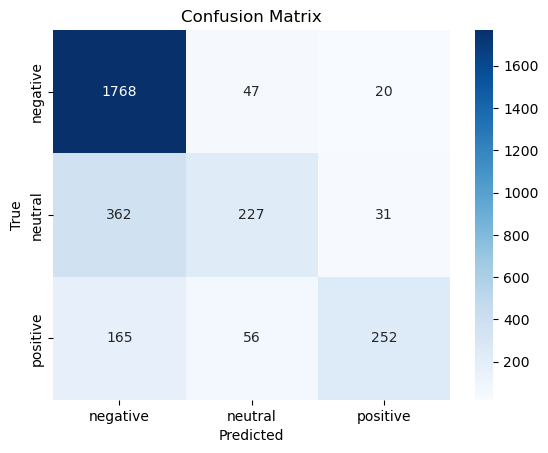

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

pred = clf.predict(Xte)
print(classification_report(y_test, pred, digits=3))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [17]:
print("Top words for each sentiment:")

import numpy as np
feature_names = np.array(tfidf.get_feature_names_out())
coefs = clf.coef_

for i, sentiment in enumerate(label_map.keys()):
    top = np.argsort(coefs[i])[-15:][::-1]
    print(f"\n{sentiment}:")
    print(", ".join(feature_names[top]))


Top words for each sentiment:

negative:
hour, delayed, bag, hold, worst, hr, customer, delay, luggage, cancelled, call, nothing, never, lost, waiting

neutral:
destinationdragons, chance, avgeek, tomorrow, vega, question, following, atlanta, ceo, fleek, possible, know, march, please, flyingitforward

positive:
great, thanks, thank, love, awesome, best, amazing, thx, appreciate, good, kudos, excellent, wonderful, rock, jetblue


In [19]:
df.to_csv("twitter_airline_cleaned.csv", index=False)
